In [1]:
import numpy as np
from matplotlib import pyplot as plt

num_blocks = 10_000
price_factor = 1.01
price_history = [100.0]
# create price history
for _ in range(1, num_blocks):
    # multiplier = price_factor if np.random.rand() > 0.5 else 1 / price_factor
    multiplier = np.random.normal(1, 0.01)
    new_price = price_history[-1] * multiplier
    price_history.append(new_price)

In [2]:
# arb every blocks
arb_profits = []
arb_profit_history = [0.0]
laggard_price_history = [100.0]
for block in range(1, num_blocks):
    laggard_price_history.append(price_history[block])
    arb_profit = abs(laggard_price_history[-1] - laggard_price_history[-2])
    arb_profits.append(arb_profit)
    arb_profit_history.append(arb_profit_history[-1] + arb_profit)
print(f"arb profit every 1 blocks: {arb_profit_history[-1]}")

arb profit every 1 blocks: 20125.767999794294


In [3]:
# arb every 2 blocks
arb_profits_2 = []
arb_profit_history_2 = [0.0]
laggard_price_history = [100.0]
for block in range(1, num_blocks):
    allowed_to_arb = block % 2 == 0
    if allowed_to_arb:
        laggard_price_history.append(price_history[block])
        arb_profit = abs(laggard_price_history[-1] - laggard_price_history[-2])
        arb_profits_2.append(arb_profit)
        arb_profit_history_2.append(arb_profit_history_2[-1] + arb_profit)
    else:
        laggard_price_history.append(laggard_price_history[-1])
        arb_profit_history_2.append(arb_profit_history_2[-1])
print(f"arb profit every 2 blocks: {arb_profit_history_2[-1]}")

arb profit every 2 blocks: 14130.115726597684


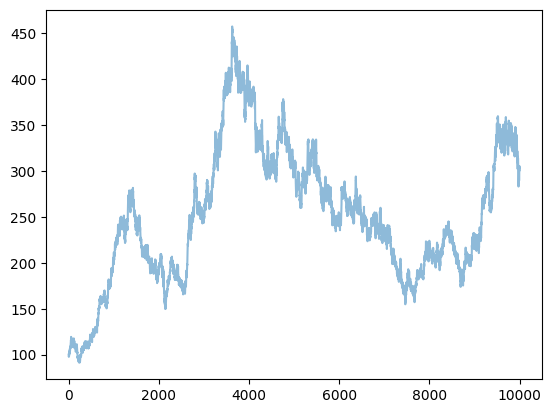

In [4]:
# check out price history
plt.plot(price_history, alpha=0.5)
plt.show()

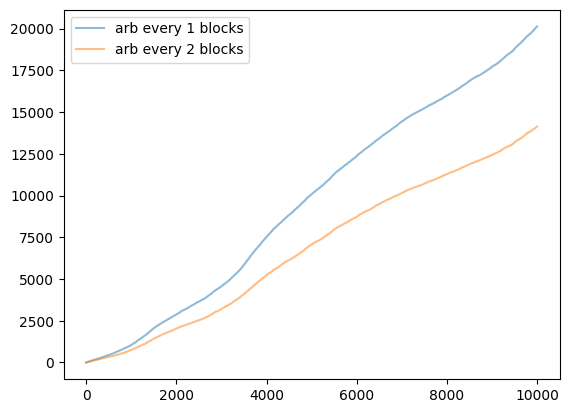

In [5]:
# plot arb profits
plt.plot(arb_profit_history, alpha=0.5, label="arb every 1 blocks")
plt.plot(arb_profit_history_2, alpha=0.5, label="arb every 2 blocks")
plt.legend();
plt.show()

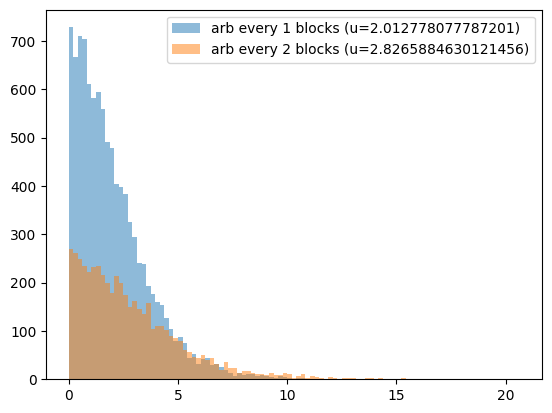

In [6]:
# overlap histograms of observed arb profits
max_arb = max(arb_profits + arb_profits_2)
bins = np.linspace(0, max_arb, 100)
plt.hist(arb_profits, alpha=0.5, label=f"arb every 1 blocks (u={np.mean(arb_profits)})", bins=bins)
plt.hist(arb_profits_2, alpha=0.5, label=f"arb every 2 blocks (u={np.mean(arb_profits_2)})", bins=bins)
plt.legend()
plt.show()